## t-Test
- Analyzes whether there is a significant difference between the mean values of two groups
- Assumptions:
    - Variables are metric
    - Normal distribution
    - Variances in groups must be approximately equal (independent samples t-Test)

### t-Test in Python ###
**ttest_ind** for independent samples <br />
**ttest_rel** for related samples

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [3]:
df = pd.read_csv("data/Gender-ResponseTime.csv")
df

,Gender,Response_time
0,female,34
1,female,36
2,female,41
3,female,43
4,female,44
5,female,37
6,male,45
7,male,33
8,male,35
9,male,39


**Null Hypothesis ($ H_0 $):** The mean response times for males are not signficantly different than the mean response times for females <br/>
**Alternative Hypothesis ($ H_1 $):** The mean response times for males are  signficantly different than the mean response times for females

In [4]:
group2 = df.where(df.Gender== 'male').dropna()['Response_time']

In [5]:
group1 = df.where(df.Gender== 'female').dropna()['Response_time']

In [6]:
group1

0    34.0
1    36.0
2    41.0
3    43.0
4    44.0
5    37.0
Name: Response_time, dtype: float64

In [7]:
group2

6     45.0
7     33.0
8     35.0
9     39.0
10    42.0
Name: Response_time, dtype: float64

In [8]:
stats.ttest_ind(group1,group2)

TtestResult(statistic=0.1355387591877689, pvalue=0.8951689966739832, df=9.0)

**pvalue (0.895) > threshold (0.05)** <br />
Cannot reject the null hypothesis


Let's adjust the response time values for one of the groups

In [18]:
f = lambda x: x - 10
group2 = group2.apply(f)

In [19]:
stats.ttest_ind(group1,group2)

TtestResult(statistic=3.832050373399641, pvalue=0.0040150950653638435, df=9.0)

**pvalue (0.004) < threshold (0.05)** <br />
We reject the null hypothesis
<br/>
<br/>
<br/>



## ANOVA
- Analyzes whether there is a significant difference between the mean values of more than two groups
- Assumptions:
    - Variables are metric
    - Normal distribution
    - Variances in groups must be approximately equal (independent samples t-Test)

In [24]:
df = pd.read_csv("data/OneWayANOVA.csv")
df

,BP,Drug
0,128,Drug A
1,130,Drug A
2,132,Drug A
3,135,Drug A
4,129,Drug A
...,...,...
85,139,Drug C
86,141,Drug C
87,140,Drug C
88,138,Drug C


In [25]:
df.Drug.unique()

array(['Drug A', 'Drug B', 'Drug C'], dtype=object)

**Null Hypothesis ($ H_0 $):** The are no differences between the means of the systolic blood pressures of the individual groups<br/>
**Alternative Hypothesis ($ H_1 $):** At least two group means differ from each other in the population

In [26]:
groups = df.groupby("Drug").groups
group1 = df.BP[groups["Drug A"]]
group2 = df.BP[groups["Drug B"]]
group3 = df.BP[groups["Drug C"]]
group1.describe()

count     30.000000
mean     133.266667
std        2.887946
min      128.000000
25%      131.000000
50%      133.000000
75%      135.750000
max      139.000000
Name: BP, dtype: float64

In [27]:
group2.describe()

count     30.000000
mean     139.033333
std        3.986904
min      131.000000
25%      136.250000
50%      139.000000
75%      142.000000
max      145.000000
Name: BP, dtype: float64

In [28]:
group3.describe()

count     30.00000
mean     137.00000
std        3.73243
min      130.00000
25%      134.00000
50%      137.00000
75%      139.75000
max      145.00000
Name: BP, dtype: float64

In [29]:
# Perform the ANOVA
stats.f_oneway(group1,group2,group3)

F_onewayResult(statistic=20.172052401746733, pvalue=6.346112123576863e-08)

**Alternative ANOVA  using *statsmodels* library**

In [30]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('BP ~ Drug',                 # Model formula
            data = df).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)

               sum_sq    df          F        PR(>F)
Drug       513.266667   2.0  20.172052  6.346112e-08
Residual  1106.833333  87.0        NaN           NaN


Both calculations show that **pvalue < threshold (0.05)** <br />
We can reject the null hypothesis


## $ Chi^2\ Test $
- A hypothesis test that is to determine if there is a relationship between **two categorical variables**.
- Assumptions:
    - The expected frequencies per cell are greater than 5
    - Uses only the categories, not the rankings


In [31]:
df = pd.read_csv("data/Gender-Newspaper.csv")
df

,Gender,Newspaper
0,male,New York Post
1,male,New York Post
2,male,New York Post
3,male,New York Post
4,male,New York Post
...,...,...
87,female,WSJ
88,female,WSJ
89,female,WSJ
90,female,WSJ


**Null Hypothesis ($ H_0 $):** The is **no relationship** between gender and the preferred newspaper<br/>
**Alternative Hypothesis ($ H_1 $):** There **is a relationship** between gender and the preferred newspaper<br/><br/>
Use panda's *crosstab* method to create a contingency table

In [32]:
contingency = pd.crosstab(df.Newspaper, df.Gender)
contingency

Gender,female,male
Newspaper,,
New York Post,6,7
New York Times,16,15
USA Today,13,16
WSJ,8,11


In [33]:
# Chi-square test of independence. 
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contingency) 
# Print the p-value
print('Chi statistic: ' + str(p))
print('df: ' + str(dof))
print('pvalue: ' + str(p))
print('expected:')
print(expected)


Chi statistic: 0.9180008113875626
df: 3
pvalue: 0.9180008113875626
expected:
[[ 6.07608696  6.92391304]
 [14.48913043 16.51086957]
 [13.55434783 15.44565217]
 [ 8.88043478 10.11956522]]


**expected** shows what the contingency table would look like if the 2 variables were perfectly independent <br/>
**pvalue** is significantly greater than the threshhold and we cannot reject the null hypothesis<br/><br/>
Let's adjust the response time values for one of the gender categories

In [34]:
for x in range(contingency.shape[0]):
    if x % 2 == 1:
        contingency.iloc[[x],[0]] = contingency.iloc[[x],[0]] + 20
contingency

Gender,female,male
Newspaper,,
New York Post,6,7
New York Times,36,15
USA Today,13,16
WSJ,28,11


In [35]:
# Chi-square test of independence. 
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contingency) 
# Print the p-value
print('Chi statistic: ' + str(p))
print('df: ' + str(dof))
print('pvalue: ' + str(p))
print('expected:')
print(expected)


Chi statistic: 0.041429356361741464
df: 3
pvalue: 0.041429356361741464
expected:
[[ 8.17424242  4.82575758]
 [32.06818182 18.93181818]
 [18.23484848 10.76515152]
 [24.52272727 14.47727273]]


**pvalue (0.04) < threshold (0.05)** <br />
We reject the null hypothesis
<br/>
<br/>
<br/>


## Correlation Analysis
- Measure the relationship between two variables<br/>
#### Pearson Correlation (r)
- Measures the **linear** relationship between two variables


In [37]:
df = pd.read_csv("data/ReactionTime.csv")
df

,Before_Intervention,After_Intervention
0,18,25
1,22,27
2,20,20
3,25,29
4,21,26
5,24,24
6,19,22
7,23,28
8,22,24
9,20,23


**Null Hypothesis ($ H_0 $):** The correlation coefficient does not differ significantly from zero - no linear relationship<br/>
**Alternative Hypothesis ($ H_1 $):** The correlation coefficient differs significantly from zero - there is a linear relationship<br/><br/>


In [38]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
corr = df.corr(method='pearson')

In [39]:
corr

,Before_Intervention,After_Intervention
Before_Intervention,1.000000,0.702082
After_Intervention,0.702082,1.000000


In [40]:
stats.pearsonr(df.Before_Intervention, df.After_Intervention)

PearsonRResult(statistic=0.7020824008072544, pvalue=0.0005589586050621636)

#### Accept or reject the null hypothesis?<br/><br/>

Spearman Correlation (r)

- Used when the two variables are **not** linearly related<br/>
- Desribes how well the variables' relationship can be described using a monotonic function - a Pearson correlation between the **ranked** variables
- Performs a Spearman correlation on the variable ranks

In [41]:
df = pd.read_csv("data/Reaction-Age-Spearman.csv")
df

,Reaction_time,Age,Ranks_reaction_time,Ranks_age
0,12,13,1,1
1,15,25,2,3
2,17,20,3,2
3,18,35,4,5
4,20,45,5,6
5,21,30,6,4
6,22,60,7,7
7,26,95,8,8


Text(0.5, 1.0, 'Reaction Time vs. Subject Age')

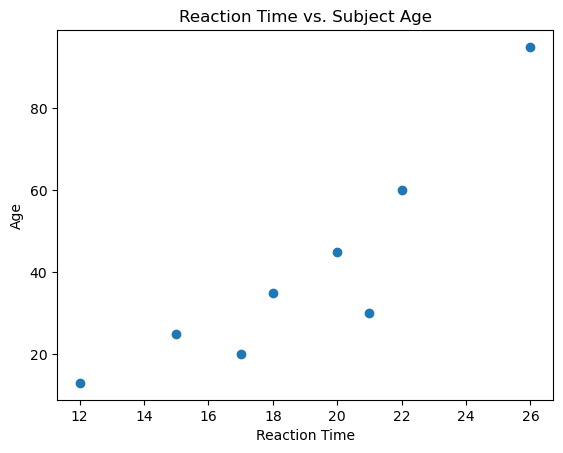

In [42]:
# Create a scatterplot
plt.scatter(df['Reaction_time'], df['Age'])
# Create label for x-axis
plt.xlabel('Reaction Time')
# Create label for y-axis
plt.ylabel('Age')
# Create title
plt.title('Reaction Time vs. Subject Age')

Text(0.5, 1.0, 'Ranked Reaction Time vs. RankedSubject Age')

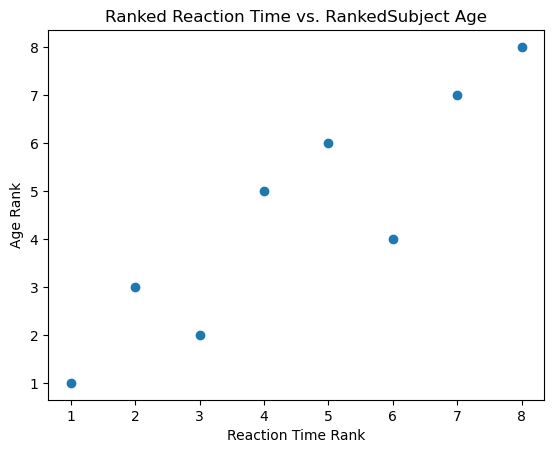

In [43]:
# Create a scatterplot
plt.scatter(df['Ranks_reaction_time'], df['Ranks_age'])
# Create label for x-axis
plt.xlabel('Reaction Time Rank')
# Create label for y-axis
plt.ylabel('Age Rank')
# Create title
plt.title('Ranked Reaction Time vs. RankedSubject Age')

In [44]:
stats.pearsonr(df.Ranks_reaction_time, df.Ranks_age)

PearsonRResult(statistic=0.9047619047619044, pvalue=0.002008275505429489)